In [490]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# setting initial values : y0 = [x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2]
y0 = np.random.rand(12)
y0[1] = 10
y0[4] = 0
y0[2] = 5
y0[5] = 0
y0[0] = 0
y0[3] = 0 
y0[8] = 5*np.random.rand(1) - 2.5
y0[11] = 5
y0[7] = 0 
y0[10] = 0
y0[6] = 0
y0[9] = 0


# setting G(gravity constant), T(terminal time), m(mass of objects)
T = 5
t = np.linspace(0, T, 1000*T)
m = np.array([10000, 10000, 1])
G = 0.1

In [491]:


# governing equation of three body problem without restriction
def three_body(y, t, m, G):
    
    x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2 = y
    
    r_01 = (x_0-x_1)**2 + (y_0-y_1)**2
    r_02 = (x_0-x_2)**2 + (y_0-y_2)**2
    r_12 = (x_2-x_1)**2 + (y_2-y_1)**2
    
    dydt = [vx_0, vx_1, vx_2, vy_0, vy_1, vy_2, 
            -G*m[1]*(x_0-x_1)/r_01**(1.5)-G*m[2]*(x_0-x_2)/r_02**(1.5),
            -G*m[0]*(x_1-x_0)/r_01**(1.5)-G*m[2]*(x_1-x_2)/r_12**(1.5), 
            -G*m[1]*(x_2-x_1)/r_12**(1.5)-G*m[0]*(x_2-x_0)/r_02**(1.5),
            -G*m[1]*(y_0-y_1)/r_01**(1.5)-G*m[2]*(y_0-y_2)/r_02**(1.5),
            -G*m[0]*(y_1-y_0)/r_01**(1.5)-G*m[2]*(y_1-y_2)/r_12**(1.5), 
            -G*m[1]*(y_2-y_1)/r_12**(1.5)-G*m[0]*(y_2-y_0)/r_02**(1.5)]
    
    return dydt



def restricted_three_body(y, t, m, G):
    
    x_0, x_1, x_2, y_0, y_1, y_2, vx_0, vx_1, vx_2, vy_0, vy_1, vy_2 = y

    r_02 = (x_0-x_2)**2 + (y_0-y_2)**2
    r_12 = (x_2-x_1)**2 + (y_2-y_1)**2
    
    dydt = [0, 0, vx_2, 0, 0, vy_2, 
            0,
            0, 
            -G*m[1]*(x_2-x_1)/r_12**(1.5)-G*m[0]*(x_2-x_0)/r_02**(1.5),
            0,
            0, 
            -G*m[1]*(y_2-y_1)/r_12**(1.5)-G*m[0]*(y_2-y_0)/r_02**(1.5)]
    
    return dydt



In [492]:
# solve ODE
sol = odeint(restricted_three_body, y0, t, args=(m, G))

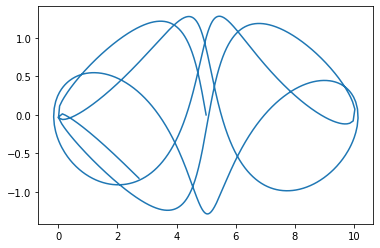

In [493]:
# plotting
plt.plot(sol[:,2], sol[:,5])
plt.show()
